---
### 黄河小浪底调水调沙问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

#### 1. 插值

In [2]:
from scipy.interpolate import interp1d

data = np.loadtxt('../../07第7章  插值与拟合/data7_19.txt')
yw0 = data[::2].flatten()
ys0 = data[1::2].flatten()
y0 = yw0 * ys0
start, stop = 3600*(12*1 - 4), 3600*(12*24 - 4)
t0 = np.linspace(start, stop, 24)
f = interp1d(t0, y0, 'cubic')
t = np.arange(start, stop+60, 60)
y = f(t)
W = np.trapz(y, t)
print("总排沙量(kg)为：", W)

总排沙量(kg)为： 184396665411.88434


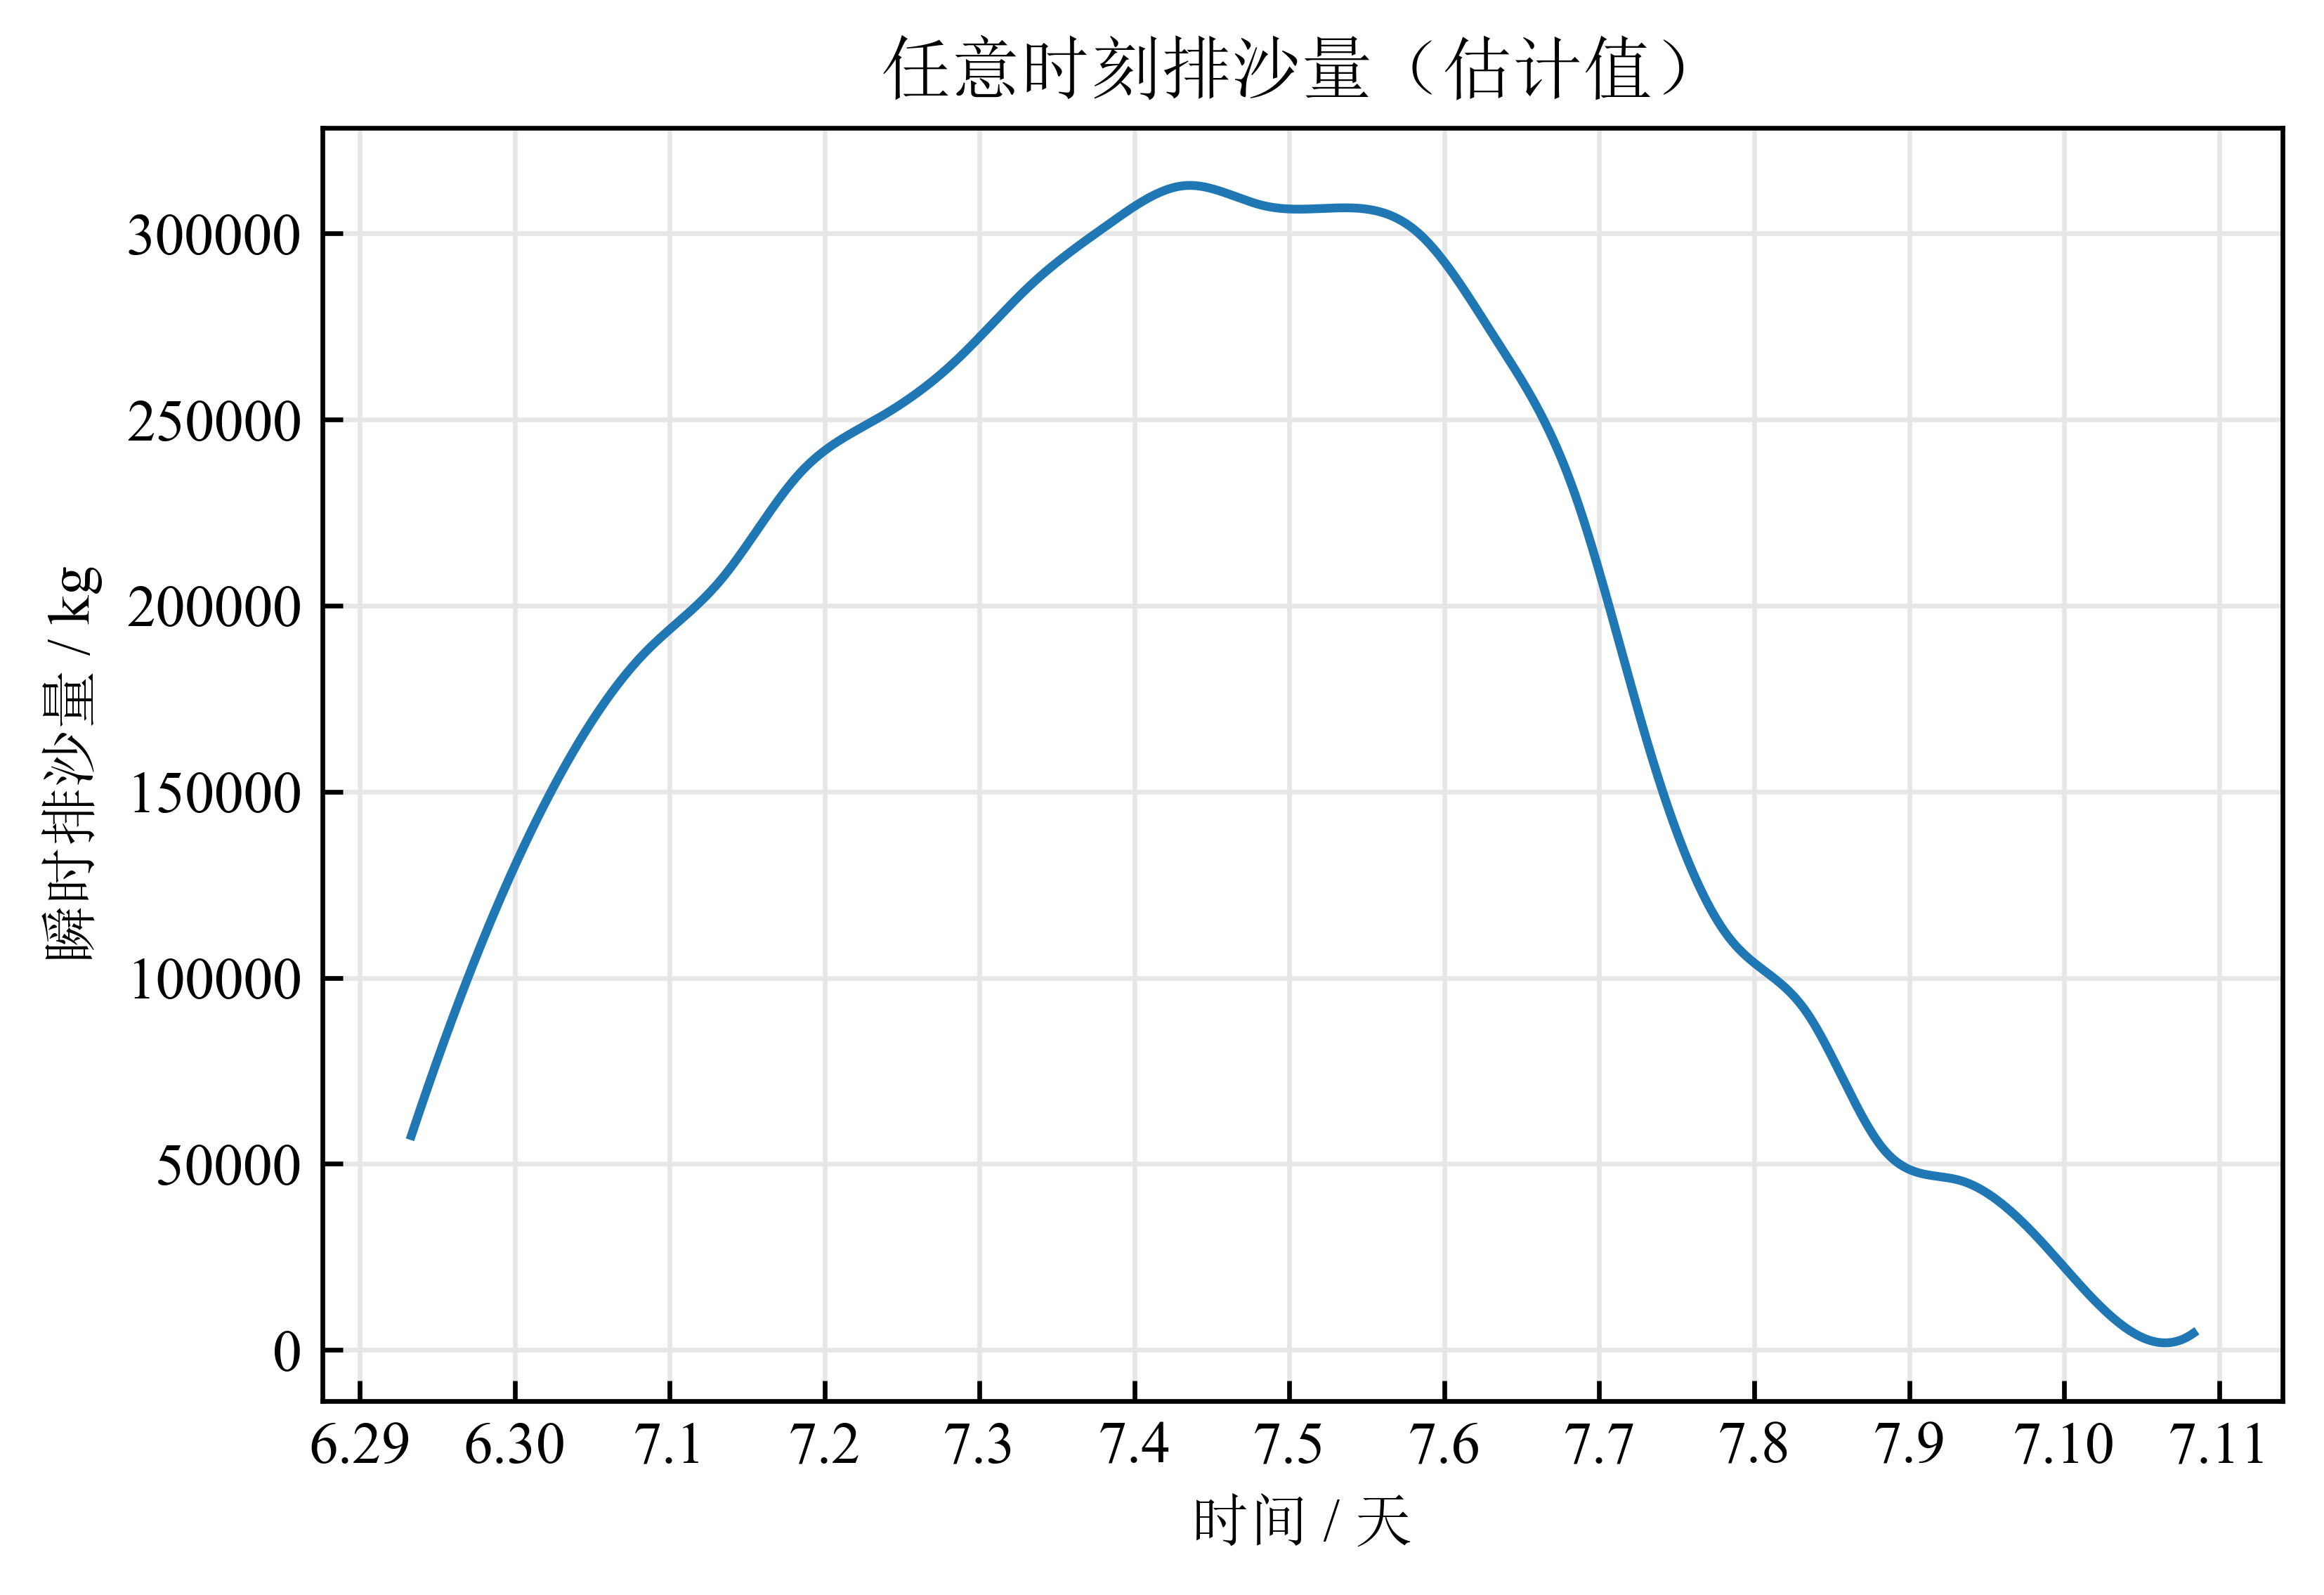

In [3]:
fig = plt.figure(dpi=600)

ax = fig.add_subplot(111)
ax.plot(t, y)
ax.set_xlabel("时间 / 天")
ax.set_ylabel("瞬时排沙量 / kg")
ax.set_title("任意时刻排沙量（估计值）")
from matplotlib.ticker import FixedLocator, FixedFormatter
dayt = np.arange(0, 13*24*3600 + 24*3600, 24*3600)
ax.xaxis.set_major_locator(FixedLocator(dayt))
days = ['6.29', '6.30'] + ['7.' + str(i) for i in range(1, 12)]
ax.xaxis.set_major_formatter(FixedFormatter(days))
ax.grid(linestyle='-', color='0.9')
fig.show()

#### 2. 拟合

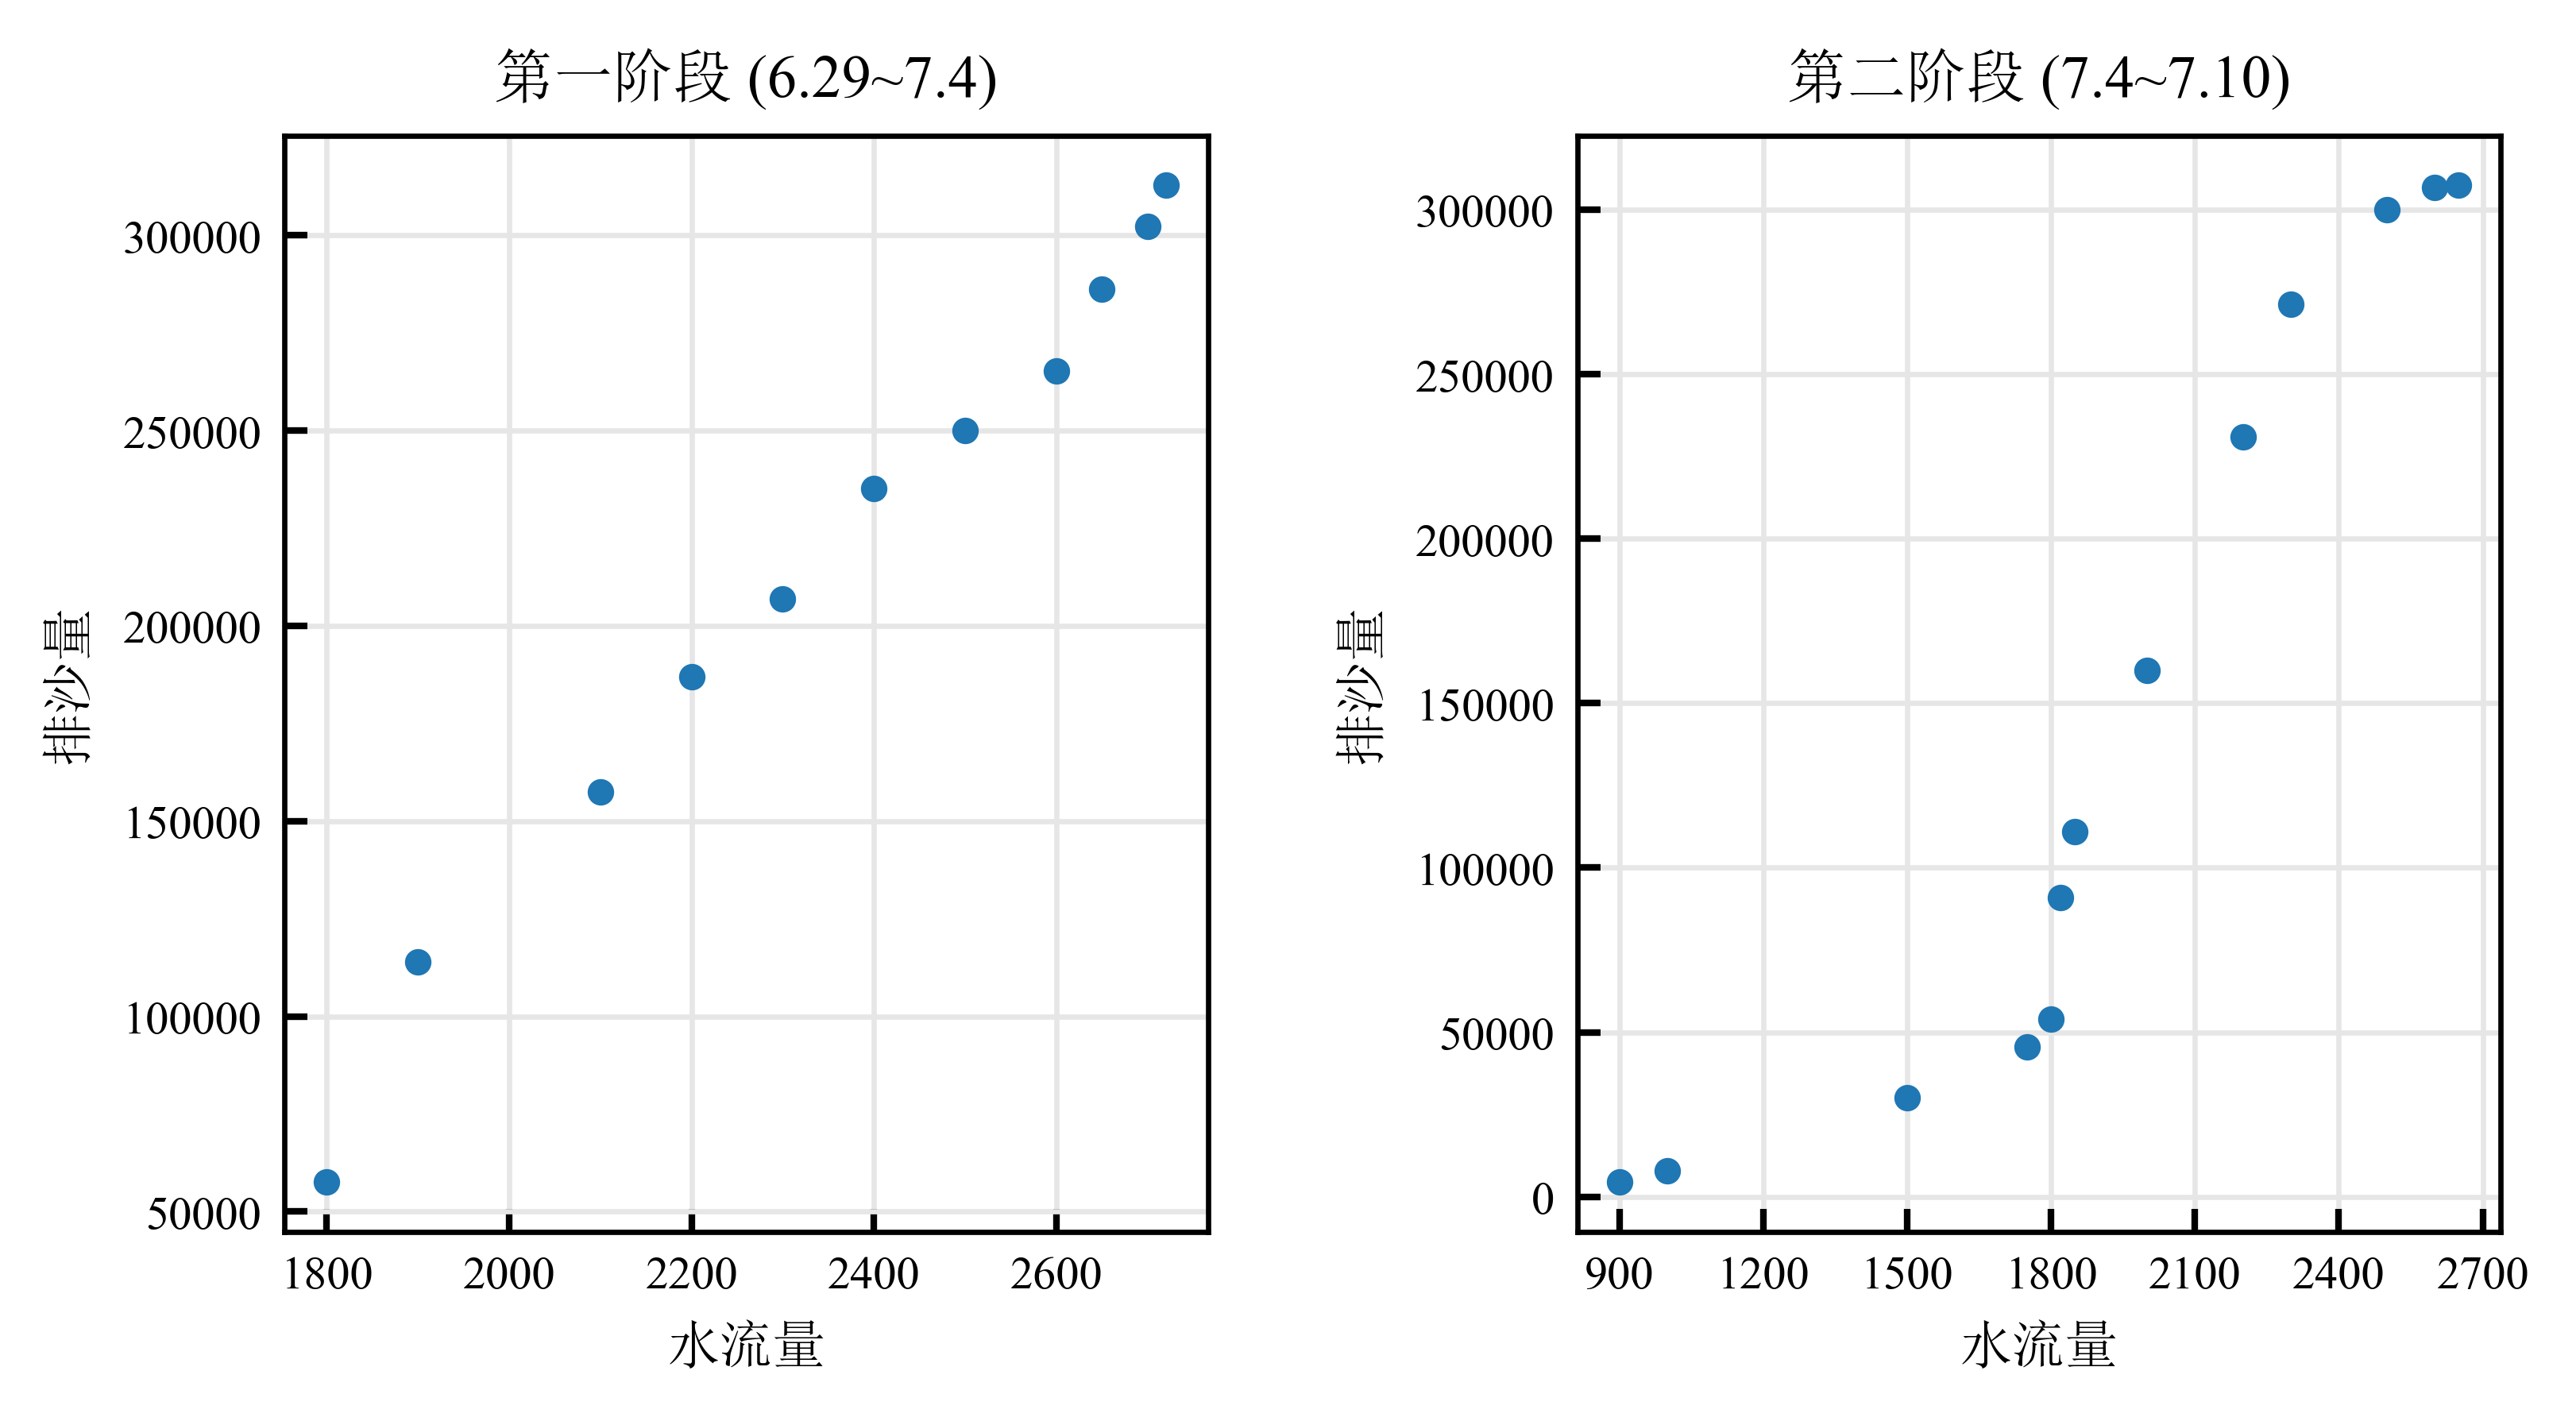

In [4]:
split_point = 11

fig = plt.figure(dpi=600)
ax = fig.add_subplot(121)
ax.scatter(yw0[:split_point], y0[:split_point], marker='.', zorder=10)
ax.set_xlabel("水流量", fontsize=8)
ax.set_ylabel("排沙量", fontsize=8)
ax.set_title("第一阶段 (6.29~7.4)", fontsize=9)
ax.tick_params(which='major', width=1, labelsize=7)
ax.grid(linestyle='-', color='0.9')

ax1 = fig.add_subplot(122)
ax1.scatter(yw0[split_point:], y0[split_point:], marker='.', zorder=10)
ax1.set_xlabel("水流量", fontsize=8)
ax1.set_ylabel("排沙量", fontsize=8)
ax1.set_title("第二阶段 (7.4~7.10)", fontsize=9)
from matplotlib.ticker import MultipleLocator
ax1.xaxis.set_major_locator(MultipleLocator(300))
ax1.tick_params(which='major', width=1, labelsize=7)
ax1.grid(linestyle='-', color='0.9')

fig.subplots_adjust(left=None, bottom=None, right=None, top=0.7, wspace=0.4, hspace=None)
fig.show()

第一、二阶段都分别用一、二次函数进行拟合，根据模型的剩余标准差来确定选择哪种拟合函数

In [5]:
rmse1, rmse2 = np.zeros(2), np.zeros(2) # 一、二阶段两种拟合的剩余标准差
A1, A2 = [], []

yw10 = yw0[:split_point]
y10 = y0[:split_point]
yw20 = yw0[split_point:]
y20 = y0[split_point:]

for i in range(1,3):
    A1.append(np.polyfit(yw10, y10, i))
    print(f"第一阶段 {i} 次多项式系数：", A1[i-1])
    y1p = np.polyval(A1[i-1], yw10)
    n, m = len(yw10), i
    rmse1[i-1] = np.sqrt(np.sum((y10 - y1p)**2)/(n-m))
print("第一阶段 拟合剩余标准差：", rmse1)

print()

for i in range(1,3):
    A2.append(np.polyfit(yw20, y20, i))
    print(f"第二阶段 {i} 次多项式系数：", A2[i-1])
    y2p = np.polyval(A2[i-1], yw20)
    n, m = len(yw20), i
    rmse2[i-1] = np.sqrt(np.sum((y20 - y2p)**2)/(n-m))
print("第二阶段 拟合剩余标准差：", rmse2)

第一阶段 1 次多项式系数： [ 2.50565486e+02 -3.73384466e+05]
第一阶段 2 次多项式系数： [-5.82350463e-02  5.16415287e+02 -6.71064432e+05]
第一阶段 拟合剩余标准差： [9594.88461819 8753.05267845]

第二阶段 1 次多项式系数： [ 2.02434781e+02 -2.39534846e+05]
第二阶段 2 次多项式系数： [ 1.06659104e-01 -1.80466799e+02  7.24210982e+04]
第二阶段 拟合剩余标准差： [43961.57177296 29521.48144429]


> 可以看到二次函数在两个阶段的拟合效果都更优

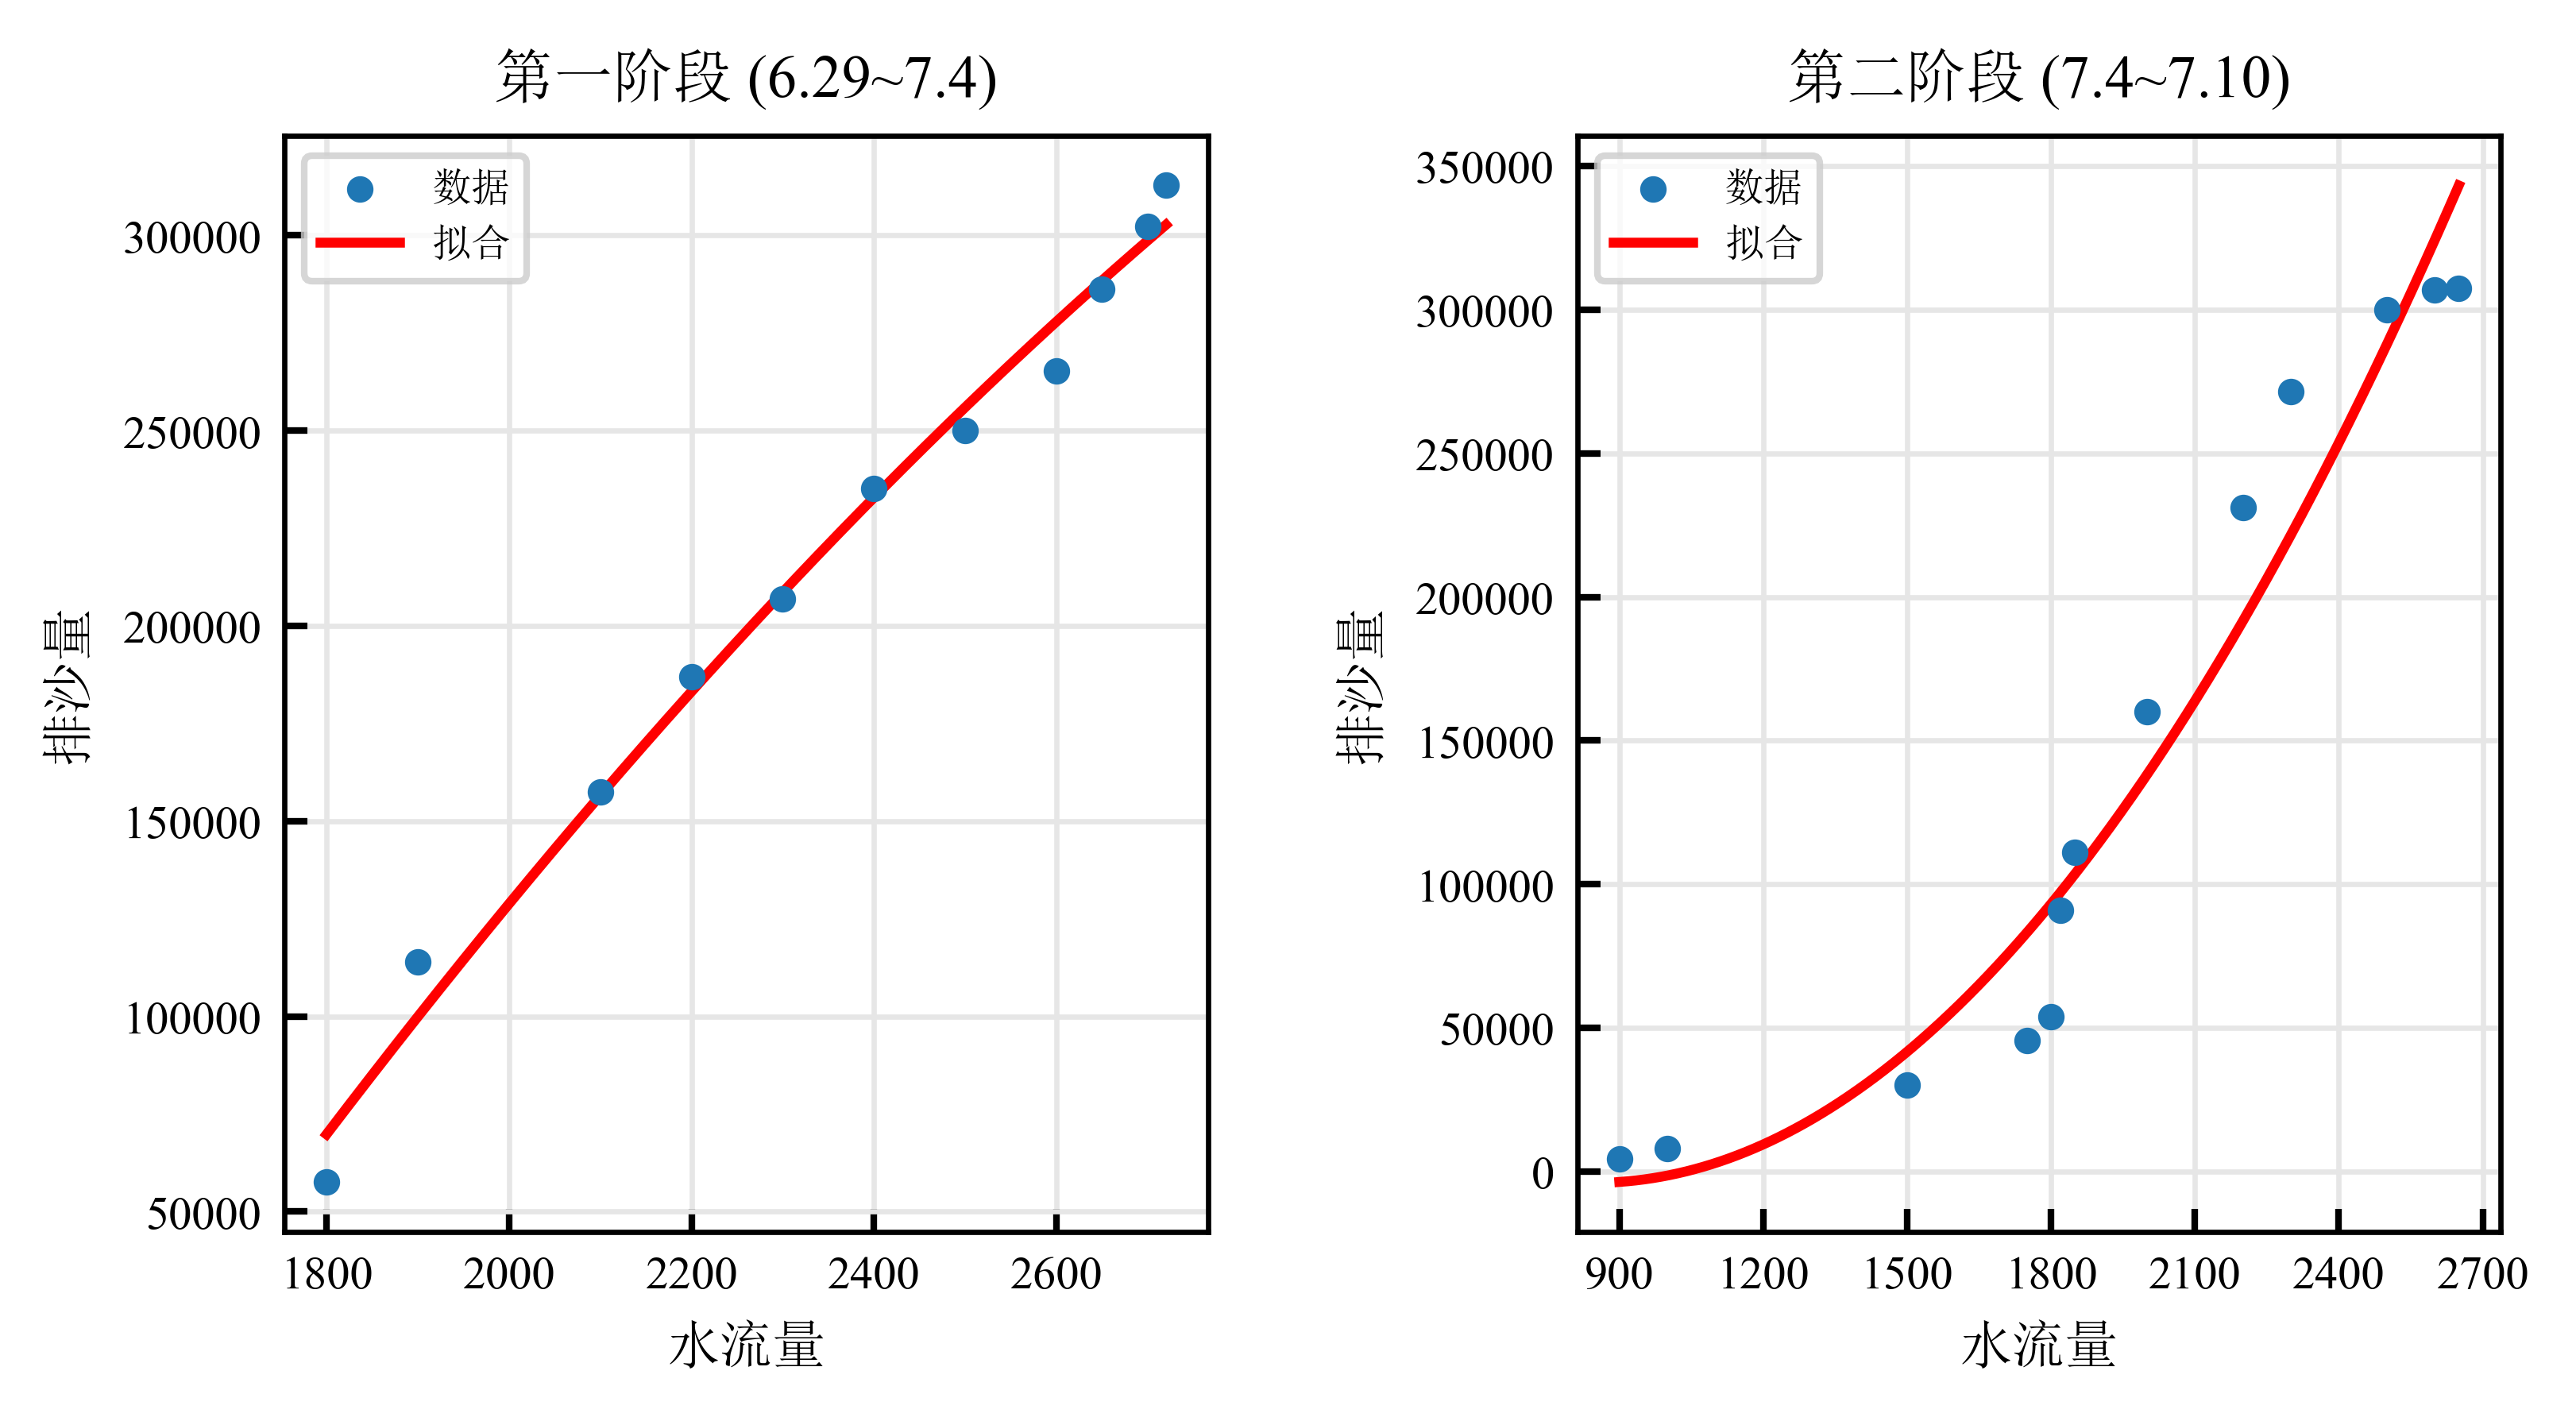

In [6]:
yw1 = np.linspace(yw10.min(), yw10.max(), 1000)
y1 = np.polyval(A1[1], yw1)

yw2 = np.linspace(yw20.min(), yw20.max(), 1000)
y2 = np.polyval(A2[1], yw2)

fig = plt.figure(dpi=600)
ax = fig.add_subplot(121)
ax.scatter(yw0[:split_point], y0[:split_point], marker='.', zorder=10, label='数据')
ax.plot(yw1, y1, 'r', label='拟合')
ax.set_xlabel("水流量", fontsize=8)
ax.set_ylabel("排沙量", fontsize=8)
ax.set_title("第一阶段 (6.29~7.4)", fontsize=9)
ax.tick_params(which='major', width=1, labelsize=7)
ax.legend(fontsize=6)
ax.grid(linestyle='-', color='0.9')

ax1 = fig.add_subplot(122)
ax1.scatter(yw0[split_point:], y0[split_point:], marker='.', zorder=10, label='数据')
ax1.plot(yw2, y2, 'r', label='拟合')
ax1.set_xlabel("水流量", fontsize=8)
ax1.set_ylabel("排沙量", fontsize=8)
ax1.set_title("第二阶段 (7.4~7.10)", fontsize=9)
from matplotlib.ticker import MultipleLocator
ax1.xaxis.set_major_locator(MultipleLocator(300))
ax1.tick_params(which='major', width=1, labelsize=7)
ax1.legend(fontsize=6)
ax1.grid(linestyle='-', color='0.9')

fig.subplots_adjust(left=None, bottom=None, right=None, top=0.7, wspace=0.4, hspace=None)
fig.show()